In [ ]:
import os
import tensorflow as tf
from tensorflow import keras

In [ ]:
# load data

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()



11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

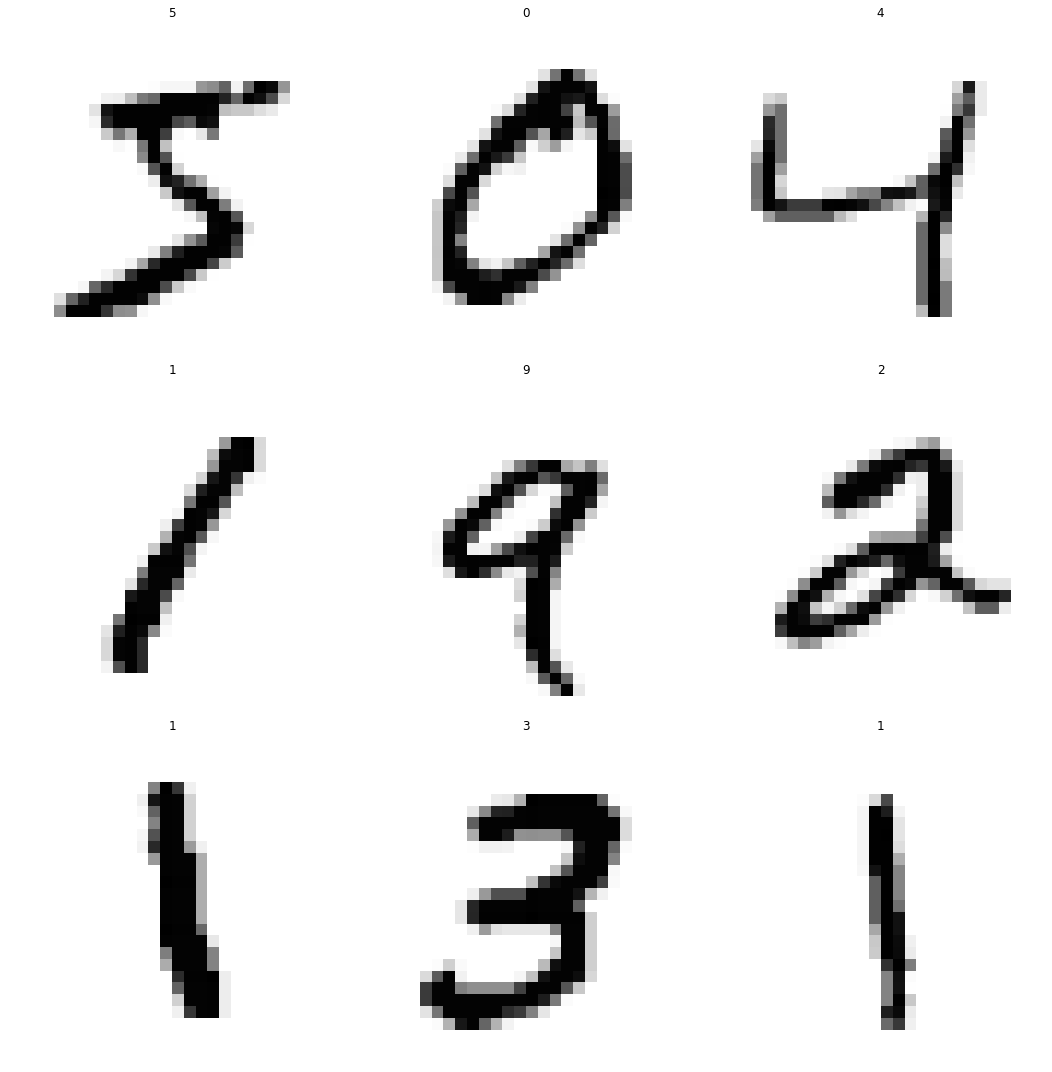

In [ ]:
from matplotlib import pyplot as plt
# make figure 
plt.figure(figsize=(15,15))
# loop to get images 
for n in range(9):
  # make subplot 
  plt.subplot(3,3,n+1)
  # make plot image 
  plt.imshow(x_train[n],cmap='Greys')
  # add title 
  plt.title(y_train[n])
  # make axis off 
  plt.axis('off')
# make plot 
plt.tight_layout()
# make show 
plt.show()

In [ ]:
x_train = x_train/255.0
x_test = x_test/255.0

In [ ]:
data_shape = x_train.shape
print(f'There are{data_shape[0]} examples with shape({data_shape[1]}, {data_shape[2]})')

There are60000 examples with shape(28, 28)


In [ ]:
# Graded class: myCallback
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('accuracy') is not None and logs.get('accuracy')>0.995:
      print('\nReached 99% accuracy so cancelling training')

      #Stop training
      self.model.stop_training = True

In [ ]:
def train_mnist(x_train, y_train):
  callbacks = myCallback()

  #define the model
  model = tf.keras.models.Sequential([
      tf.keras.layers.Flatten(input_shape=(28,28)),
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
      tf.keras.layers.Dense(10, activation=tf.nn.softmax)
  ])

  # Compile the model
  model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
    
    # Fit the model for 10 epochs adding the callbacks
    # and save the training history
  history = model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])

    ### END CODE HERE

  return history

In [ ]:
hist = train_mnist(x_train, y_train)

Epoch 1/10
1875/1875 [==============================] - 11s 4ms/step - loss: 0.2596 - accuracy: 0.9254
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1139 - accuracy: 0.9667
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0768 - accuracy: 0.9769
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0576 - accuracy: 0.9828
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0449 - accuracy: 0.9864
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0366 - accuracy: 0.9882
Epoch 7/10
1868/1875 [============================>.] - ETA: 0s - loss: 0.0280 - accuracy: 0.9914
Reached 99% accuracy so cancelling training
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0280 - accuracy: 0.9914


In [ ]:
def trainMnist(x_train, y_train):
  callbacks = myCallback()

  #define model
  model_cnn = tf.keras.models.Sequential([
  # Add convolutional layres and MaxPooling
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',
                           input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
  ])                    
  model_cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
  history = model_cnn.fit(x_train, y_train, epochs=15)

In [ ]:
hist = train_mnist(x_train, y_train)

Epoch 1/15
1875/1875 [==============================] - 84s 45ms/step - loss: 0.0735 - accuracy: 0.9775
Epoch 2/15
1875/1875 [==============================] - 83s 44ms/step - loss: 0.0367 - accuracy: 0.9884
Epoch 3/15
1875/1875 [==============================] - 83s 44ms/step - loss: 0.0255 - accuracy: 0.9916
Epoch 4/15
1875/1875 [==============================] - 82s 44ms/step - loss: 0.0178 - accuracy: 0.9945
Epoch 5/15
1875/1875 [==============================] - 82s 44ms/step - loss: 0.0142 - accuracy: 0.9954
Epoch 6/15
1875/1875 [==============================] - 82s 44ms/step - loss: 0.0124 - accuracy: 0.9960
Epoch 7/15
1875/1875 [==============================] - 82s 44ms/step - loss: 0.0080 - accuracy: 0.9974
Epoch 8/15
1875/1875 [==============================] - 82s 44ms/step - loss: 0.0076 - accuracy: 0.9973
Epoch 9/15
1875/1875 [==============================] - 82s 44ms/step - loss: 0.0076 - accuracy: 0.9975
Epoch 10/15
1875/1875 [==============================] - 83s 44m